In [1]:
# 처음에 VGG16 을 이용해서 훈련을 시작 하였으나 VGG16은 기본 (224, 224, 3) 인데
# 현재 cifar10은 (32, 32, 3) 이어서 매우 나쁜 훈련 결과가 나왔다...
# 그래서 MObileNet 으로 바꾸었다

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
print(len(tfds.list_builders()))
print(tfds.list_builders())

413
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava'

In [4]:
data, info = tfds.load('cifar10', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_dir='C:\\Users\\euiso\\tensorflow_datasets\\cifar10\\3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        t

In [5]:
ds_train = data['train']
print(len(ds_train))

ds_train = ds_train.map(lambda x: (x['image'], x['label']))
ds_train = ds_train.filter(lambda x, y: y is not None)
ds_train = ds_train.shuffle(12000).batch(60000)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))

x_train , y_train = batch
print(x_train.shape, y_train.shape)
print(type(x_train), type(y_train))

50000
(50000, 32, 32, 3) (50000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(50000, 32, 32, 3) (50000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


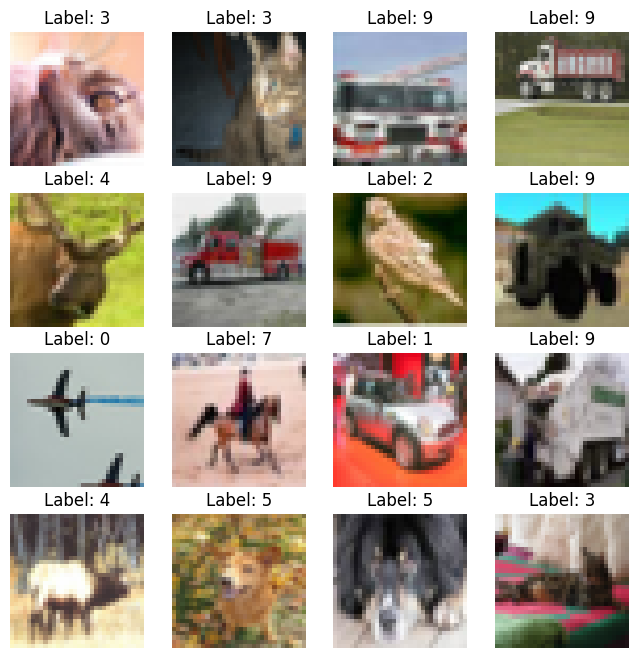

In [6]:
import matplotlib.pyplot as plt
import random

random_idx = np.random.randint(0, len(x_train), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx]}")
    plt.axis("off")

plt.show()

In [7]:
ds_test = data['test']
print(len(ds_test))

ds_test = ds_test.map(lambda x: (x['image'], x['label']))
ds_test = ds_test.shuffle(2000).batch(10000)
batch = next(iter(ds_test))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))

x_test , y_test = batch
print(x_test.shape, y_test.shape)
print(type(x_test), type(y_test))

10000
(10000, 32, 32, 3) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(10000, 32, 32, 3) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


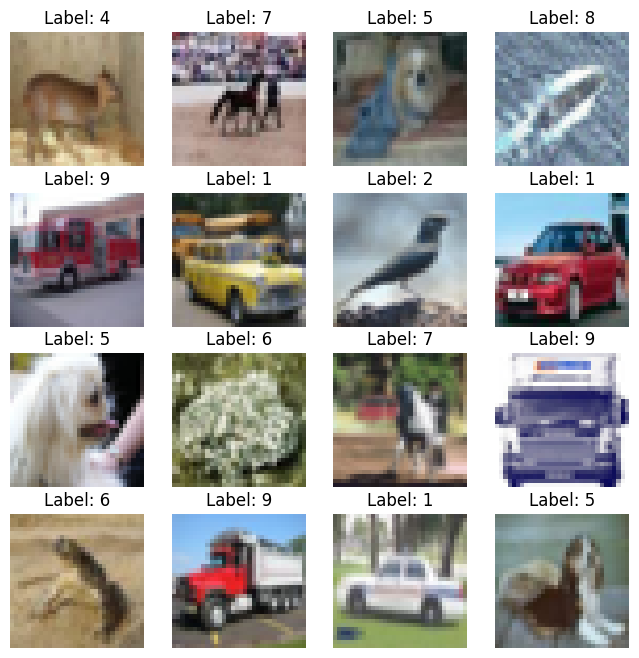

In [8]:
random_idx = np.random.randint(0, len(x_test), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Label: {y_test[idx]}")
    plt.axis("off")

plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

x_train = np.array(x_train) / 255
x_test = np.array(x_test) /255

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))

(50000, 32, 32, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (50000,) <class 'tensorflow.python.framework.ops.EagerTensor'>
(50000, 32, 32, 3) <class 'numpy.ndarray'> (50000,) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import DenseNet121


base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()
model.add(base_model)

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(Conv2D(32,(3, 3), activation='relu'))
# # model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 445ms/step - acc: 0.5537 - loss: 1.3214 - val_acc: 0.6728 - val_loss: 1.0067
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 245s 392ms/step - acc: 0.7345 - loss: 0.7935 - val_acc: 0.7537 - val_loss: 0.7426
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 375ms/step - acc: 0.7242 - loss: 0.8133 - val_acc: 0.7195 - val_loss: 0.8649
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 249s 398ms/step - acc: 0.7993 - loss: 0.6112 - val_acc: 0.7733 - val_loss: 0.6938
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 380ms/step - acc: 0.8581 - loss: 0.4242 - val_acc: 0.7767 - val_loss: 0.6874
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 283s 452ms/step - acc: 0.8808 - loss: 0.3541 - val_acc: 0.7524 - val_loss: 0.7646
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 270s 432ms/step - acc: 0.8826 - loss: 0.3615 - val_acc: 0.7704 - val_loss: 0.6987
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 397ms/step - acc: 0.8989 - loss: 0.2977 - val_acc: 0.7364 - val_loss: 0.9105
Epoch 9/30
625/625 ━━━━━

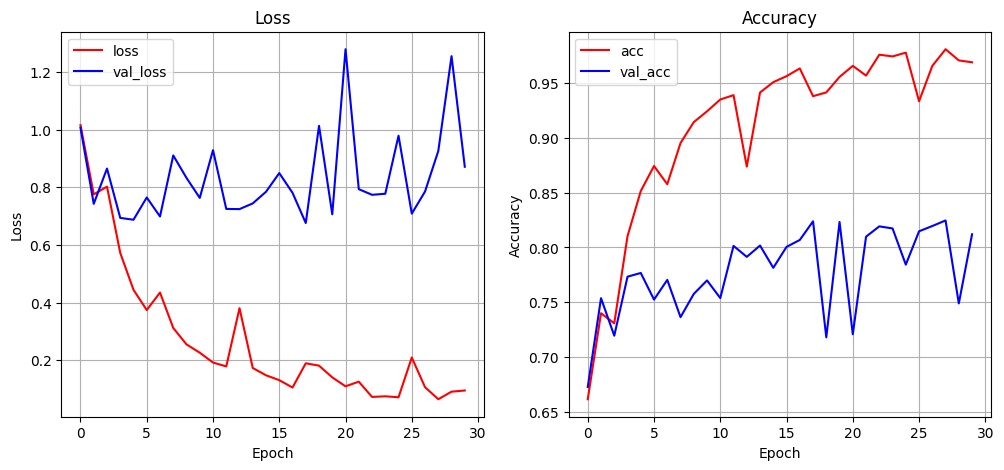

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='acc', color='red')
plt.plot(history.history['val_acc'], label='val_acc', color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - acc: 0.8230 - loss: 0.8414
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step
[2.7617530e-11 9.9991810e-01 1.2922847e-13 9.5507734e-12 1.2983655e-16
 1.8544052e-14 6.3627294e-13 2.4179443e-15 1.8423922e-08 8.1932543e-05] 1


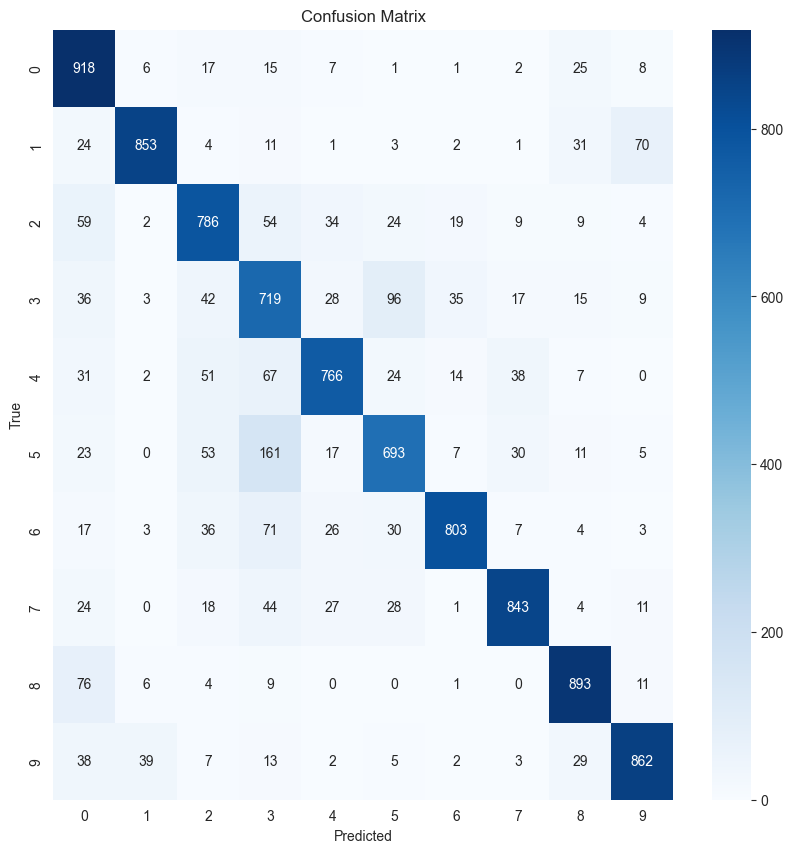

In [13]:
from sklearn.metrics import confusion_matrix

model.evaluate(x_test, y_test)

pred_ys = model.predict(x_test)
print(pred_ys[0], np.argmax(pred_ys[0]))


plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.legend()
# plt.grid()

plt.show()